<a href="https://colab.research.google.com/github/rdbhatkal/Ad-Click-Prediction/blob/main/Ad_clicks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ad Click Prediction

The goal of the project is to predict who is likely going to click on the Ad on a website based on the features of a user. 

In [1]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the csv file from the drive 
filename = '/content/drive/MyDrive/coding dojo/Stack 2/Week 3/advertising.csv'
df = pd.read_csv(filename)

In [4]:
# Looking at first 5 rows of the dataframe
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
#The shape of the data set 
df.shape

(1000, 10)

## Part 1 : Cleaning and Handelling duplicate values

In [6]:
# Looking at the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
# Checking for duplicate values
df.duplicated().sum()

0

In [8]:
# Checking and handeling null values
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

There are no null values or duplicate values in our dataset so we continue with our exploration 

### Lets check the column datatypes to ensure it matches the data description

In [9]:
# Find all attributes that are int or float
dtypes = df.dtypes
num_cols = dtypes[dtypes!='object'].index
num_cols

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad'],
      dtype='object')

In [10]:
#Looking of any inconsistencies in numerical variables
for col in num_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= Daily Time Spent on Site
77.05    3
62.26    3
75.55    3
84.53    3
78.76    3
        ..
61.09    1
65.77    1
37.87    1
60.91    1
45.01    1
Name: Daily Time Spent on Site, Length: 900, dtype: int64



- Column= Age
31    60
36    50
28    48
29    48
33    43
35    39
30    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
45    30
39    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
20     6
21     6
57     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: Age, dtype: int64



- Column= Area Income
61833.90    1
58966.22    1
69805.70    1
60315.19    1
67323.00    1
           ..
74024.61    1
60550.66    1
57983.30    1
52736.33    1
29875.80    1
Name: Area Income, Length: 1000, dtype: int64



- Column= Daily Internet Usage
161.16    2
158.22    2
228.81    2
162.44    2
211.87    2
         ..
115.35    1
230.91    1
205

In [11]:
# Find all attributes that are objects
dtypes = df.dtypes
obj_cols = dtypes[dtypes=='object'].index
obj_cols

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [12]:
#Looking of any inconsistencies in object columns values
for col in obj_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= Ad Topic Line
Cloned 5thgeneration orchestration              1
Synchronized multi-tasking ability              1
Customer-focused impactful success              1
Open-source optimizing parallelism              1
Organic logistical adapter                      1
                                               ..
Enhanced zero tolerance Graphic Interface       1
De-engineered tertiary secured line             1
Reverse-engineered well-modulated capability    1
Integrated coherent pricing structure           1
Virtual 5thgeneration emulation                 1
Name: Ad Topic Line, Length: 1000, dtype: int64



- Column= City
Lisamouth         3
Williamsport      3
Wrightburgh       2
Lake Jose         2
Robertfurt        2
                 ..
Burgessside       1
Hurleyborough     1
Garychester       1
East Kevinbury    1
Ronniemouth       1
Name: City, Length: 969, dtype: int64



- Column= Country
France                                                 9
Czech Republic          

In [13]:
#Looking at the unique rows in the in object columns values
for col in obj_cols:
    print(f"- Column= {col}")
    print(df[col].nunique(dropna=False))
    print('\n\n')

- Column= Ad Topic Line
1000



- Column= City
969



- Column= Country
237



- Column= Timestamp
1000





From the above output we can see that "Ad Topic Line" and "Timestamp" have unique values for each row so we can drop these columns

In [14]:
df.drop(['Ad Topic Line', 'Timestamp'], axis=1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Clicked on Ad
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,0
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru,0
2,69.47,26,59785.94,236.50,Davidton,0,San Marino,0
3,74.15,29,54806.18,245.89,West Terrifurt,1,Italy,0
4,68.37,35,73889.99,225.58,South Manuel,0,Iceland,0
...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Duffystad,1,Lebanon,1
996,51.30,45,67782.17,134.42,New Darlene,1,Bosnia and Herzegovina,1
997,51.63,51,42415.72,120.37,South Jessica,1,Mongolia,1
998,55.55,19,41920.79,187.95,West Steven,0,Guatemala,0


## Lets us now take a look at our numerical columns

In [15]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Lets create histograms and boxplots to visualize the distribution among our univariate variables

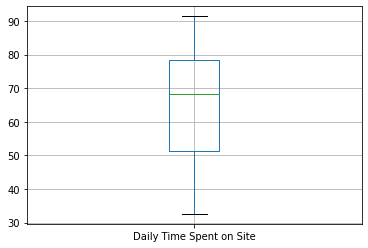

In [35]:
# checking the distribution of Daily Time Spent on Site column
df.boxplot(column = 'Daily Time Spent on Site'); 


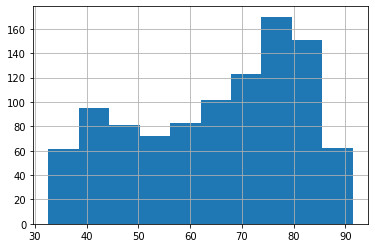

In [16]:
df['Daily Time Spent on Site'].hist();

We see that there are no outliers in our Daily Time Spent on Site column.

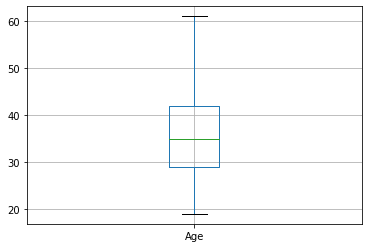

In [17]:
# checking the distribution of Age column
df.boxplot(column = 'Age'); 

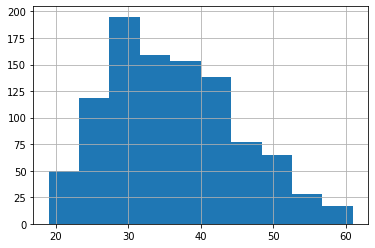

In [18]:
df['Age'].hist();

We see that there are no outliers in our Age column.

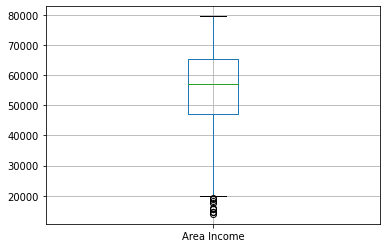

In [19]:
# checking the distribution of Area Income column
df.boxplot(column = 'Area Income'); 

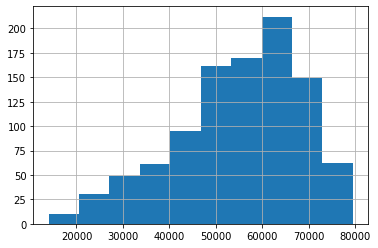

In [23]:
# checking the distribution of Area Income column
df['Area Income'].hist();

We see that there are some outliers in our Area Income column. 
The distribution of the Area Income column is right skewed

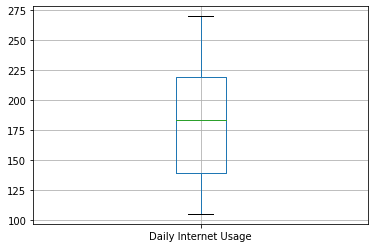

In [24]:
# checking the distribution of Daily Internet Usage column
df.boxplot(column = 'Daily Internet Usage'); 

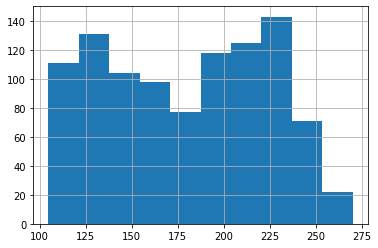

In [25]:
df['Daily Internet Usage'].hist();


We see that there are no outliers in our Daily Internet Usage column

Let us look to see what kind of relationships we have amoung our feature and target variable

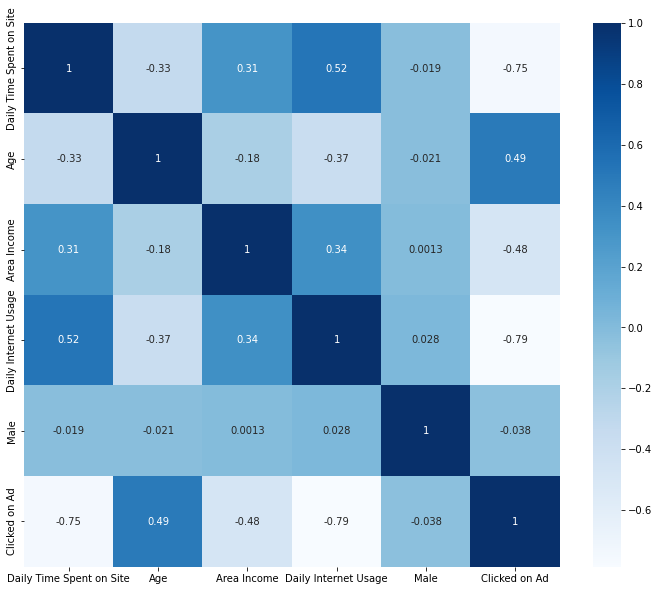

In [26]:
#Understanding correlations amoung our numeric variables
corr = df.corr()

fig = plt.figure(figsize = (12,10))
sns.heatmap(corr, cmap='Blues', annot = True);

There is are positive as well as negative correlation between the feature and the target variable. 
There is also some correlation between the features indication multicollinearity 

Source: https://seaborn.pydata.org/generated/seaborn.pairplot.html


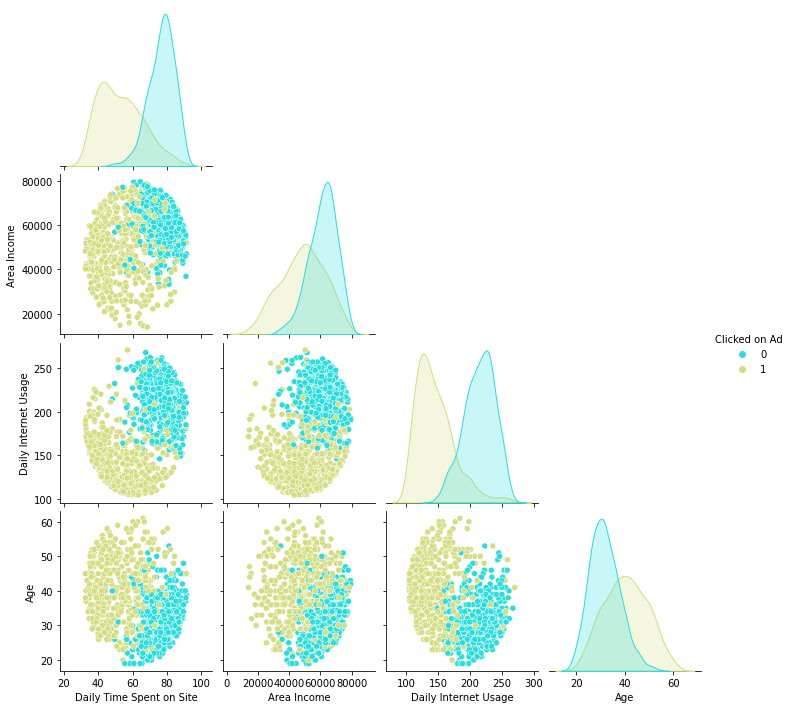

In [27]:
# Plot pairwise relationships in a dataset.
sns.pairplot(df, 
             vars = ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage','Age'],
             hue = 'Clicked on Ad', palette = 'rainbow', corner=True);